# Coding Exercises (Part 2)

## Full Data Workflow A-Z: Advanced Visualization with Seaborn

### Exercise 16: Seaborn

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

142. __Import__ the cars dataset and __drop__ any missing values (__cars.csv__)!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv("cars.csv")

In [3]:
cars.info() # 6 NA in horsepower column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
cars.dropna(inplace=True)
#cars.info()

143. __Create__ the following plot!

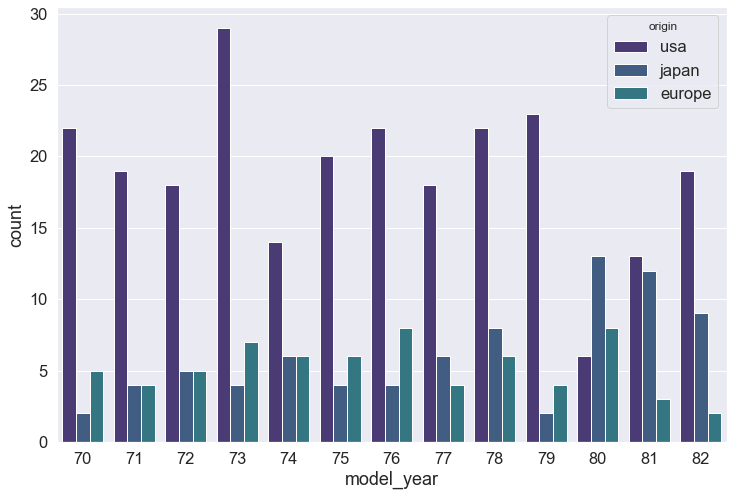

In [10]:
# COUNT PLOT
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5,palette= "viridis")
sns.countplot(data = cars, x = "model_year", hue="origin")
plt.show()

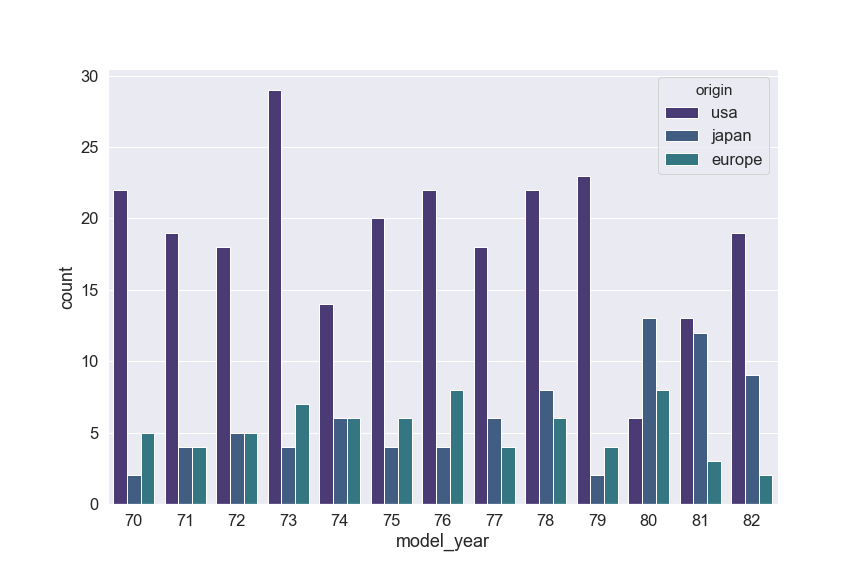

144. __Create__ the following plot! Cars with the lowest __fuel efficiency__ come from...?

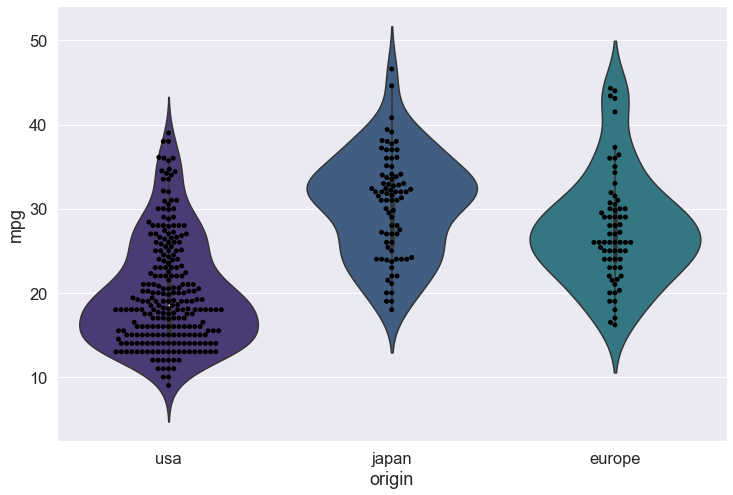

In [16]:
# VIOLIN/SWARM PLOT
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5,palette= "viridis")
sns.violinplot(data=cars, x="origin",y="mpg",dodge=True)
sns.swarmplot(data=cars, x="origin",y="mpg",color="Black",dodge=True)
plt.show()

# NOTE: Dodge=True makes no difference. Each hue is already separated!

ANSWER: USA

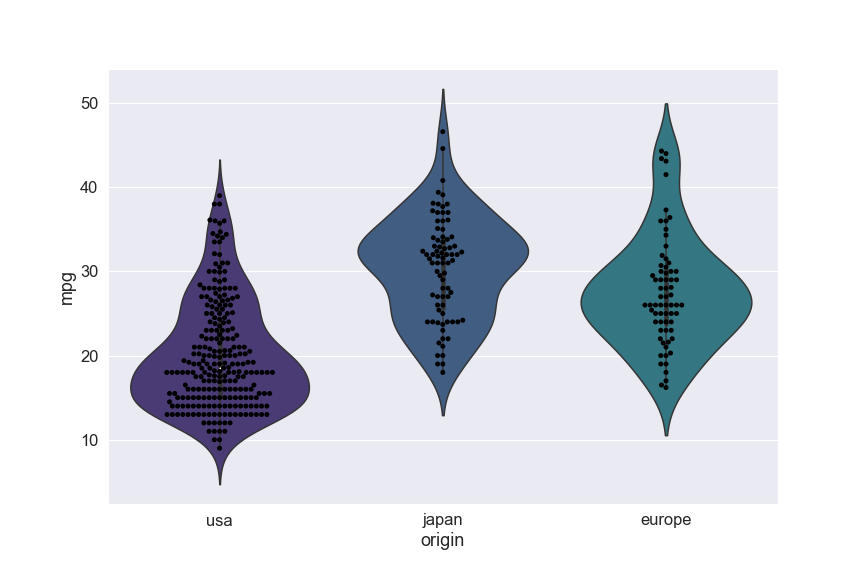

145. __Create__ the following plot! Do you think that the lower fuel efficiency of us cars is __statistically significant__? 

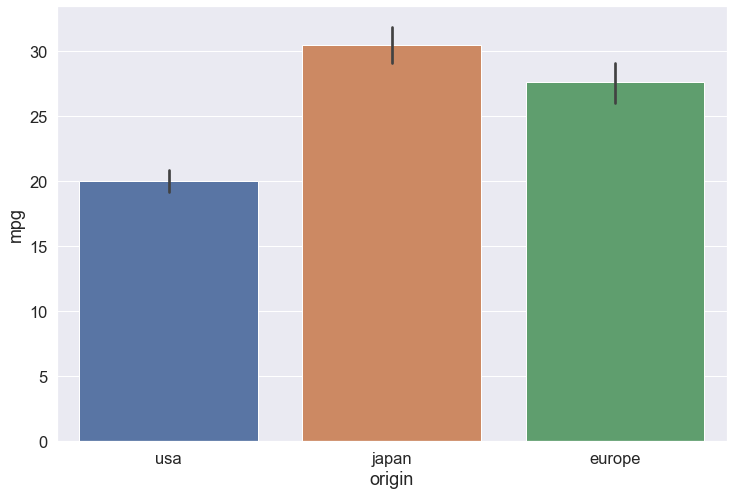

In [18]:
# BAR PLOT
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data=cars, x="origin", y="mpg") # You can use dodge=True, but it makes no difference here!
plt.show()

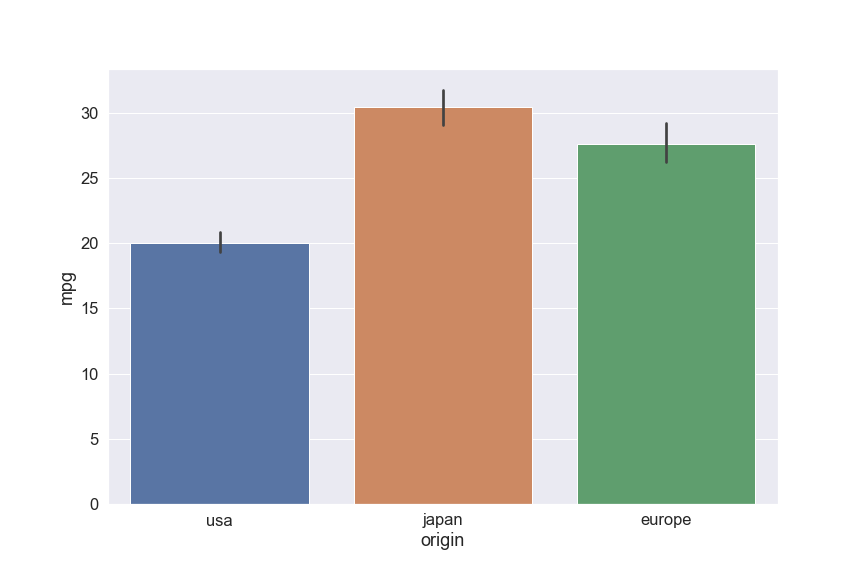

ANSWER: Yes.

146. __Create__ the following plot! Do you think that manufacturers from __all three regions significantly increased fuel efficiency__ from 1970 till 1982?

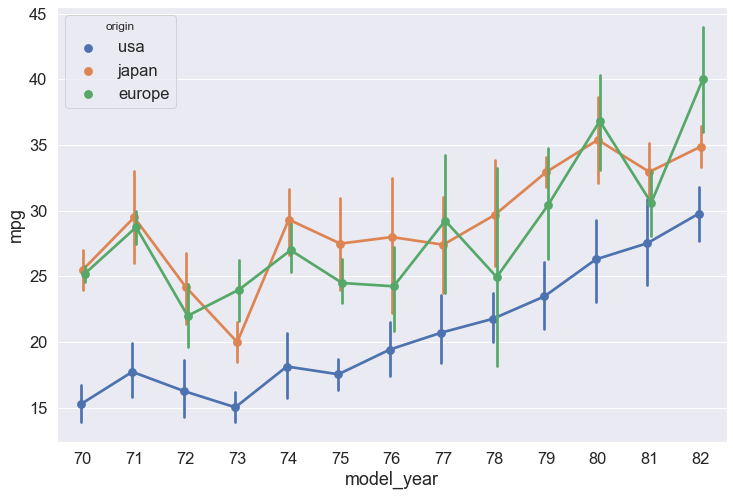

In [21]:
# POINT PLOT
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.pointplot(data=cars, x="model_year", y="mpg", hue="origin", dodge=True)
plt.show()

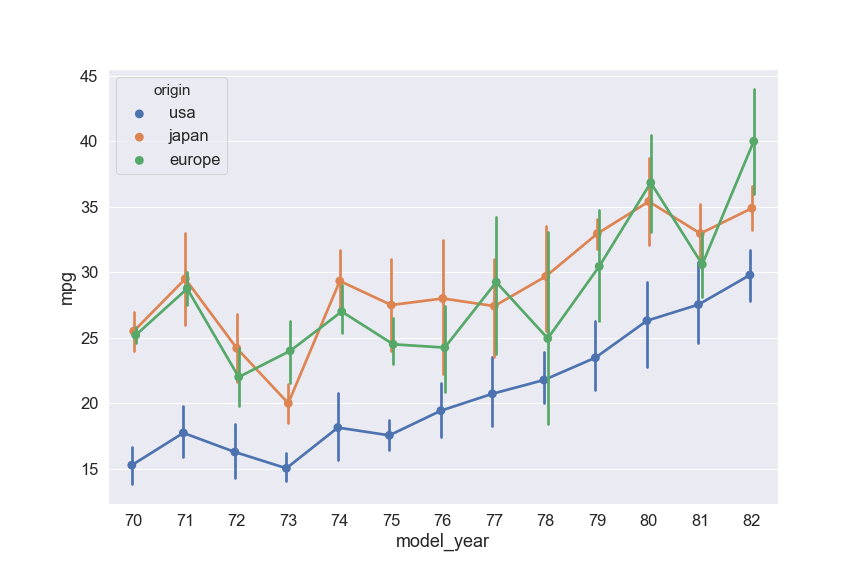

ANSWER: Yes

147. Create __similar plots__ (as above) with __horsepower__, __weight__ and __displacement__ on the y-axis! <br> Can you identify __differences__ in the ways how manufacturers managed to __increase fuel efficiency__?

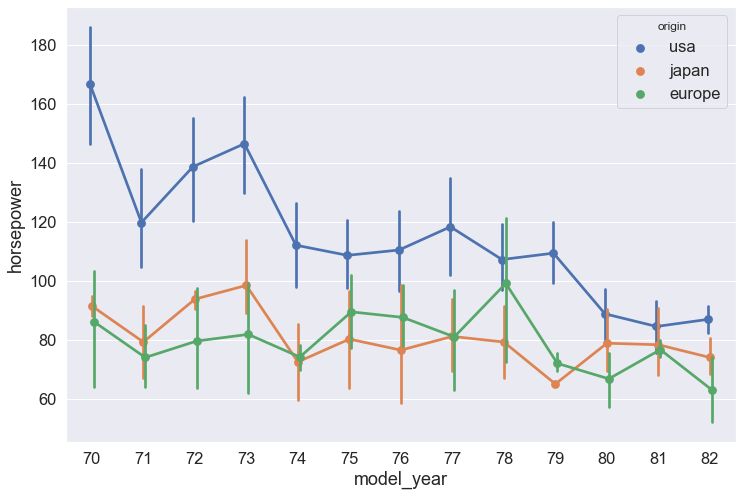

In [22]:
# POINT PLOT - horsepower
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.pointplot(data=cars, x="model_year", y="horsepower", hue="origin", dodge=True)
plt.show()

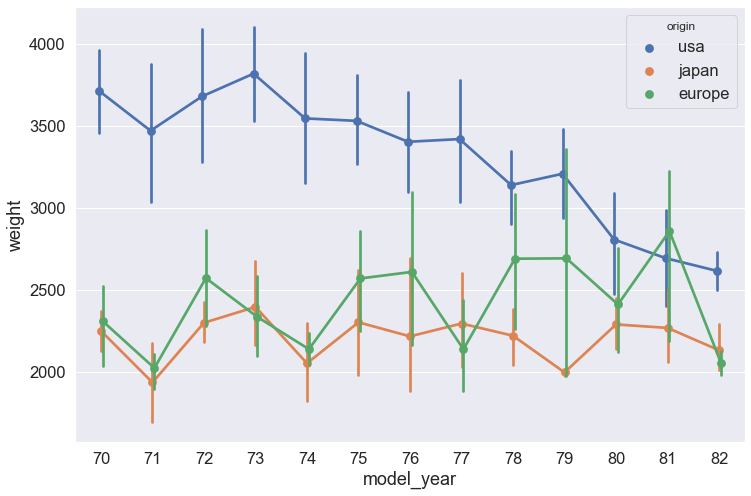

In [23]:
# POINT PLOT - weight
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.pointplot(data=cars, x="model_year", y="weight", hue="origin", dodge=True)
plt.show()

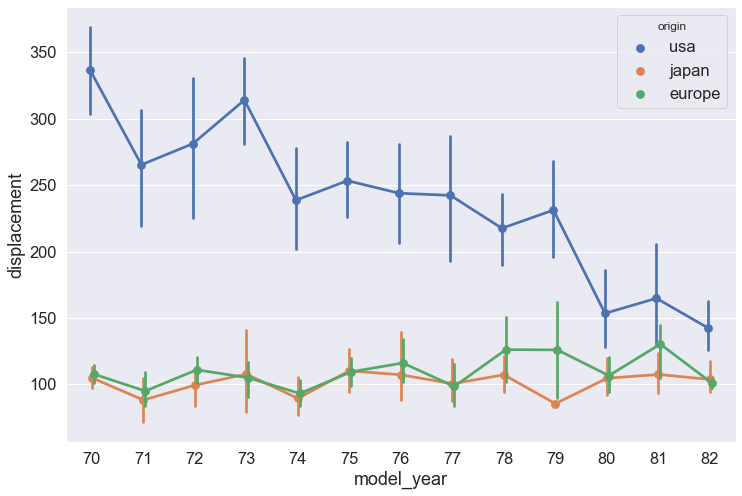

In [24]:
# POINT PLOT - displacement
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.pointplot(data=cars, x="model_year", y="displacement", hue="origin", dodge=True)
plt.show()

USA improved fuel efficiency by reducing displacement, horsepower and weight.

That decrease is not visible in Europe and Japan. Therefore, they must have use dother solutions.

148. __Add__ a new column __"gpm"__ with fuel efficiency in gallons per 100 miles unit. __Drop__ the mpg column!

In [25]:
cars["gpm"] = (1/cars.mpg*100).round(2)

In [30]:
cars.drop(axis=1,columns="mpg",inplace=True)

In [31]:
cars.head() # Check "mpg" disappeared

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,5.56
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,6.67
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,5.56
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,6.25
4,8,302.0,140.0,3449,10.5,70,usa,ford torino,5.88


149. __Create__ the following plot! Is there a __significant__ (linear) __relationship__ between horsepower and gpm?

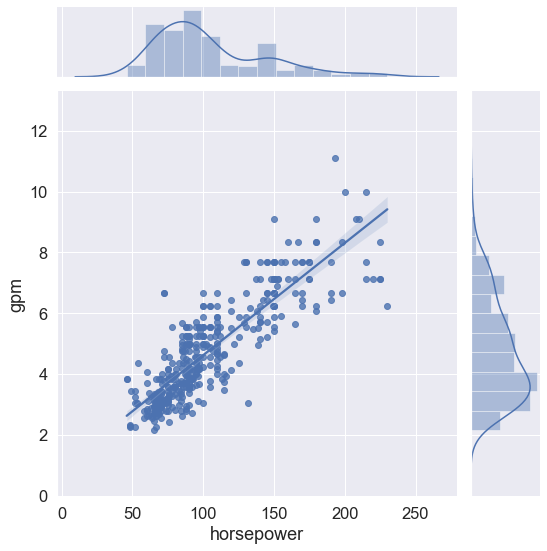

In [32]:
# JOINT PLOT: Point plot + Histogram
sns.set(font_scale=1.5)
sns.jointplot(data = cars, x = "horsepower", y = "gpm", height = 8, kind = "reg") # kind is a regression for 95% of cases
#sns.jointplot(data = titanic, x = "age", y = "fare", height = 8, kind = "hex") # kind is a hex, i.e., shows quantities
#sns.jointplot(data = titanic, x = "age", y = "fare", height = 8, kind = "kde") # kind is a kernel density estimator
plt.show()

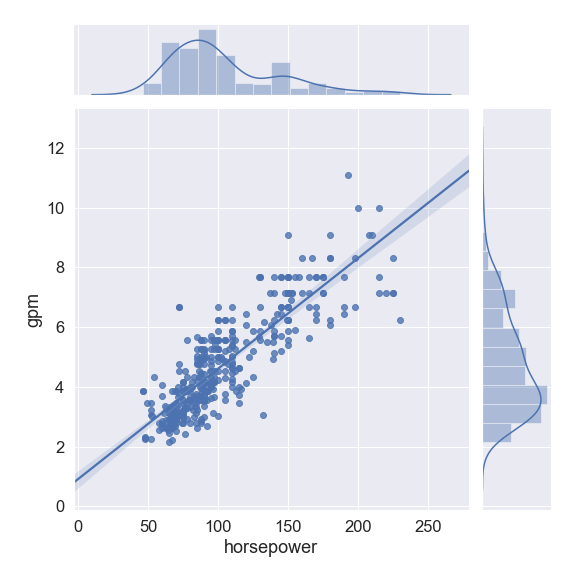

ANSWER: A resounding YES. The higher the engine power, the higher the consumption.

150. Also create the following plot!

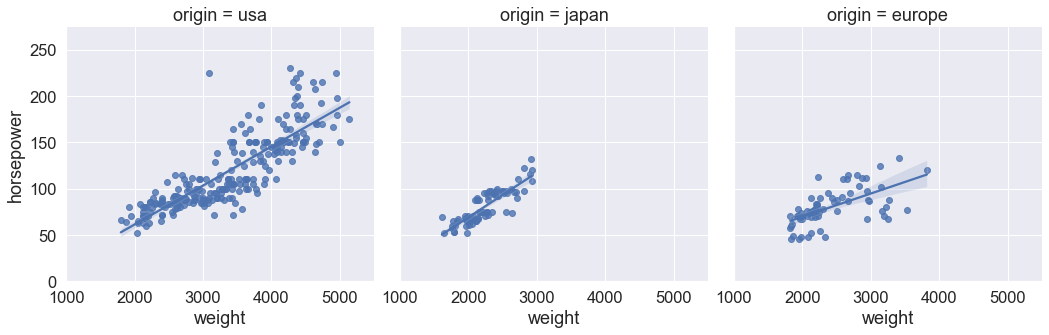

In [48]:
# LM PLOT: Linear Regression Plot
sns.set(font_scale=1.5)
#sns.lmplot(data=cars, x="weight", y="horsepower", hue="origin")
LinearRegPlot = sns.lmplot(data=cars, x="weight", y="horsepower", col="origin")
LinearRegPlot.set(xlim=(1000,5500), ylim=(0,275))
plt.show()

# NOTE: To prolong the linear regression, the original plots were build with scipy.stats.linregress() function!!!

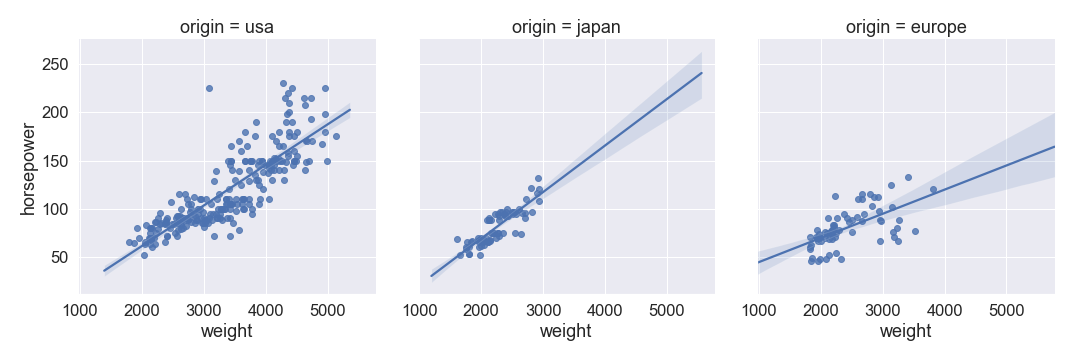

151. __Create__ the following __heatmap__ (correlation matrix)!

In [50]:
cars.corr()

,cylinders,displacement,horsepower,weight,acceleration,model_year,gpm
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,0.839311
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,0.865977
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.854707
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,0.884975
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,-0.456280
model_year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.558480
gpm,0.839311,0.865977,0.854707,0.884975,-0.456280,-0.558480,1.000000


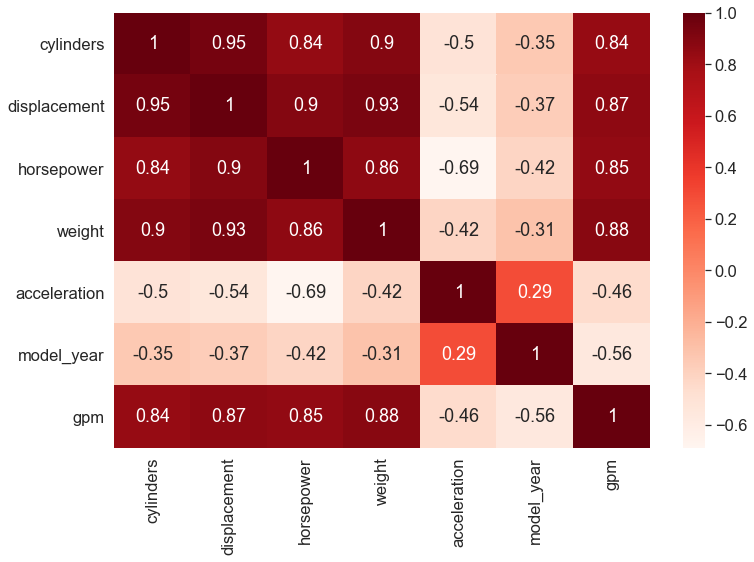

In [60]:
# HEATMAP: View all corrleations
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.heatmap(data=cars.corr(), annot=True, cmap="Reds")
plt.show()

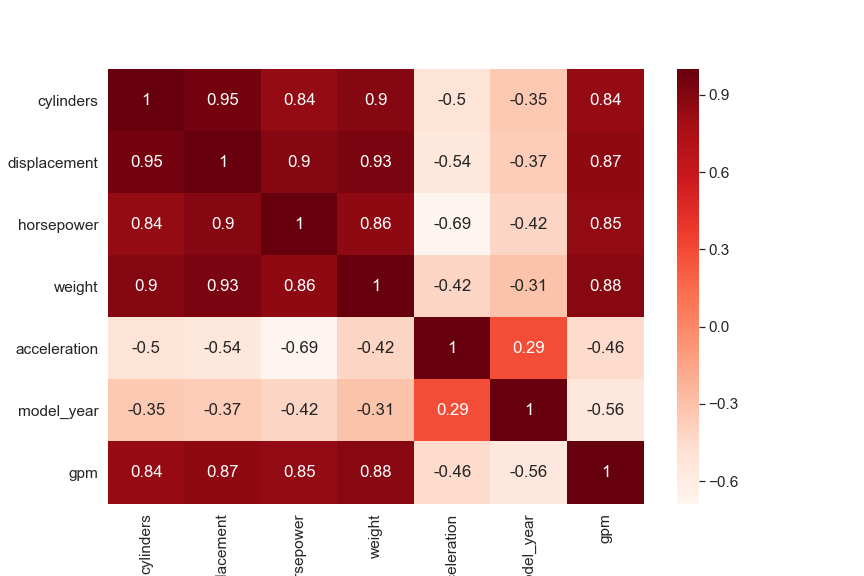

152. __Drop__ the columns __displacement__ and __acceleration__ and create the following __pairplot__ (sns.pairplot) for cars (kind = scatter)! 

In [61]:
cars.drop(axis=1,columns=["displacement","acceleration"],inplace=True)

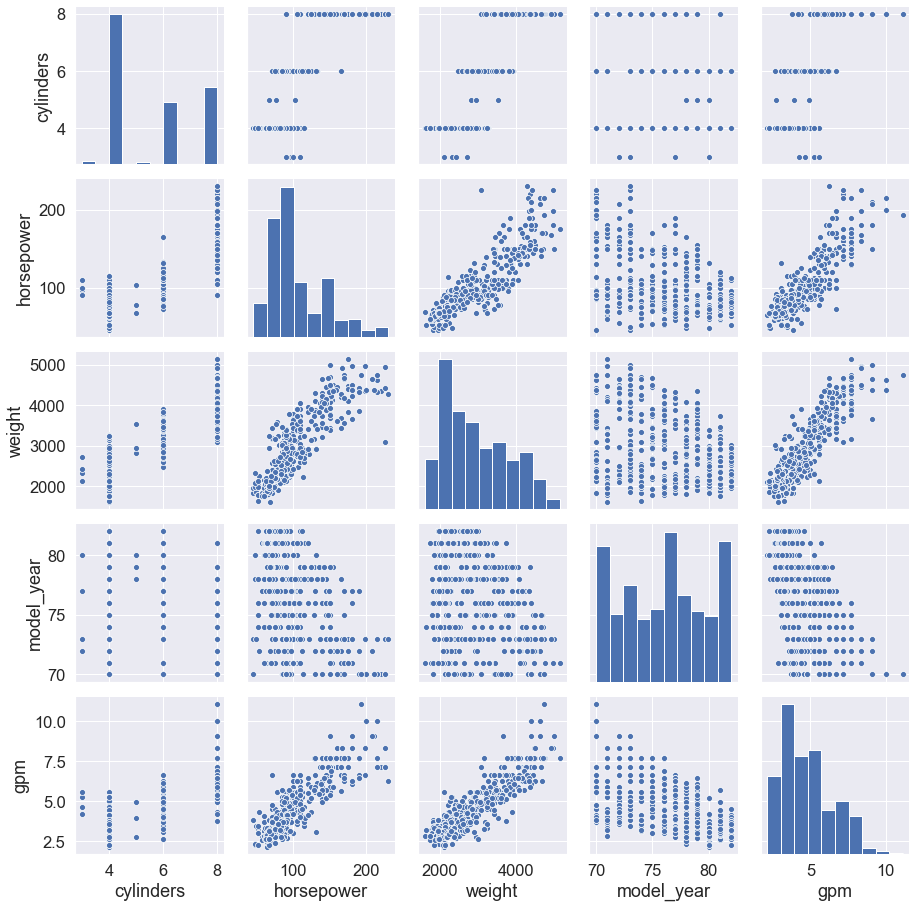

In [66]:
sns.pairplot(data=cars, kind="scatter")
plt.show()

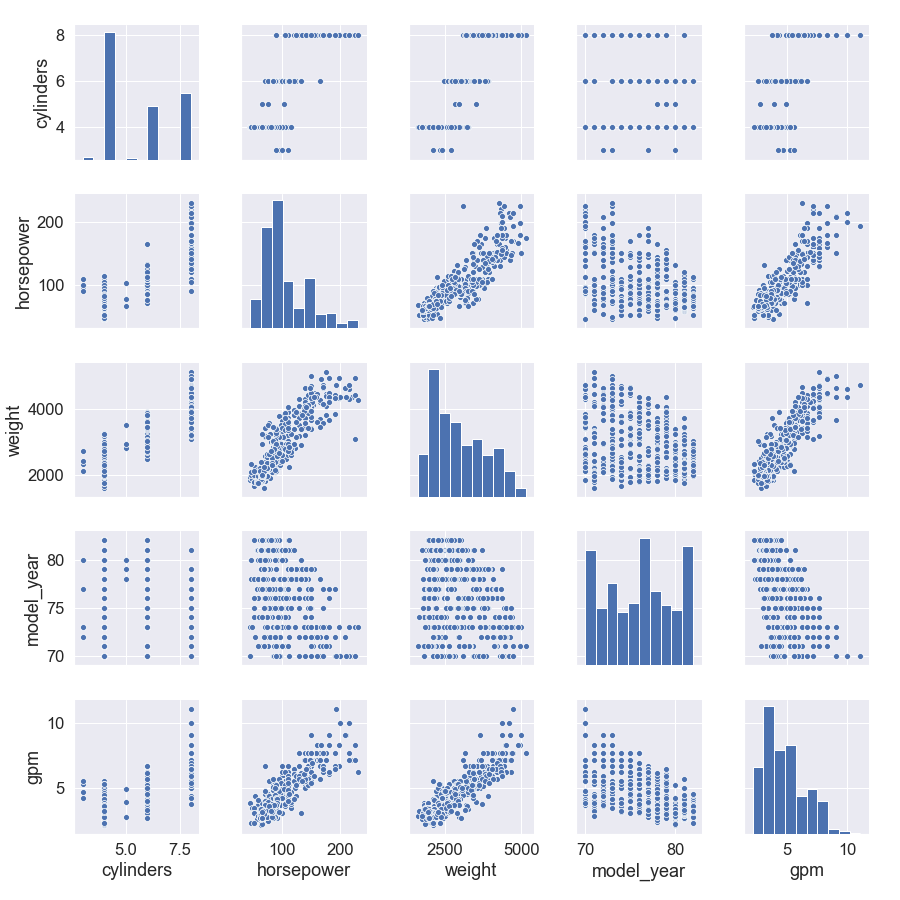

153. __Run__ the cell and __inspect__!

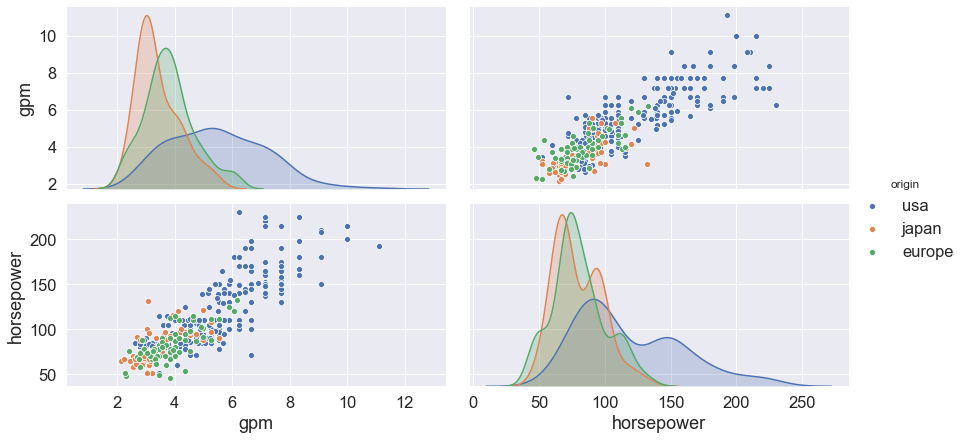

In [62]:
# run!
sns.set(font_scale=1.5)
sns.pairplot(data = cars[["gpm", "horsepower", "origin"]], kind = "scatter", hue = "origin", aspect =2, height = 3)
plt.show()

-----------------

## Option 2: Guided and Instructed

### No further guidance this time! Prepare yourself for the final challenge! (Take a look at the Hints, if necessary)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Hints (Spoiler!)

142. cars.dropna(inplace= True)

143. 

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette="viridis")
sns.countplot(data = cars, hue = "origin", x = "model_year")
plt.show()

144. 

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette="viridis")
sns.violinplot(data = cars, x = "origin", y = "mpg", dodge = True)
sns.swarmplot(data = cars, x = "origin", y = "mpg", dodge = True, color = "black")
plt.show()

145. 

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = cars, x = "origin", y = "mpg", dodge = True)
plt.show()

146. 

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.pointplot(data = cars, x = "model_year", y = "mpg", hue = "origin", dodge = True, ci = 95)
plt.show()

147. pass horsepower, weight & displacement to y!

148. 1 / mpg * 100

149.  

In [ ]:
sns.set(font_scale=1.5)
sns.jointplot(data = cars, x = "horsepower", y = "gpm", height = 8, kind = "reg")
plt.show()

150. 

In [ ]:
sns.set(font_scale=1.5)
sns.lmplot(data = cars, x = "weight", y = "horsepower", col = "origin")
plt.show()

151.

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(cars.corr(), annot= True, cmap = "Reds")
plt.show()

152. 

In [ ]:
sns.set(font_scale=1.5)
sns.pairplot(data = cars, kind = "scatter")
plt.show()

153. Nothing to do!